In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import to_hex
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, leaves_list
import matplotlib.patches as mpatches

## Input example
# 1) Gene dataframe noted with gene_class and pathways
genes_df = pd.DataFrame({"gene":["gene" + str(i) for i in range(1, 51)],
                     "gene_class": [np.random.choice(["classA", "classB"]) for _ in range(1, 51)],
                     "pathways":[np.random.choice(["A", "B", "C", "D", "E"], size=np.random.randint(1, 4), replace=False) for _ in range(1, 51)]})

# 2) Pathway index match to the gene list
pathways = [np.random.choice(["A", "B", "C", "D", "E"], size=np.random.randint(1, 4), replace=False) for _ in range(1, 51)]

# 3) Connection 
data = [
    {"source": "gene3", "target": "gene20", "interaction": "PPI"},
    {"source": "gene4", "target": "gene21", "interaction": "PPI"},
    {"source": "gene5", "target": "gene22", "interaction": "PPI"},
    {"source": "gene6", "target": "gene23", "interaction": "PPI"},
    {"source": "gene7", "target": "gene24", "interaction": "PPI"},
    {"source": "gene8", "target": "gene25", "interaction": "PPI"},
    {"source": "gene9", "target": "gene26", "interaction": "PPI"},
    {"source": "gene10", "target": "gene27", "interaction": "PPI"},
    {"source": "gene11", "target": "gene28", "interaction": "PPI"},
    {"source": "gene12", "target": "gene29", "interaction": "coexpression"},
    {"source": "gene13", "target": "gene30", "interaction": "coexpression"},
    {"source": "gene14", "target": "gene31", "interaction": "coexpression"},
    {"source": "gene15", "target": "gene32", "interaction": "coexpression"},
    {"source": "gene16", "target": "gene33", "interaction": "coexpression"},
    {"source": "gene17", "target": "gene34", "interaction": "coexpression"},
    {"source": "gene18", "target": "gene35", "interaction": "coexpression"},
    {"source": "gene19", "target": "gene36", "interaction": "PPI_coexpression"},
    {"source": "gene20", "target": "gene37", "interaction": "PPI_coexpression"},
    {"source": "gene21", "target": "gene38", "interaction": "PPI_coexpression"},
    {"source": "gene22", "target": "gene39", "interaction": "PPI_coexpression"},
]
connections = pd.DataFrame(data)

## Gathering genes with the same number of pathways
pathway_counts = np.array([[len(p)] for p in genes_df["pathways"].tolist()])  ## calculate the pathway number of each gene 
distance_matrix = pdist(pathway_counts, metric="euclidean") ## calculate the Euclidean distance for all gene pairs based on their pathway number 
linkage_matrix = linkage(distance_matrix, method="ward") ## hierarchial clustering to minimize internal variability
order = leaves_list(linkage_matrix) ## determine the optimal order of the leaves based on the hierarchical clustering

## Resorting genes_df
genes_df_sorted = genes_df.reindex(index=order)

## Generating a theta list and pair it with the sorted gene list
genes_df_sorted['gene_angle'] = np.linspace(0, 2 * np.pi, genes_df_sorted.shape[0], endpoint=False)

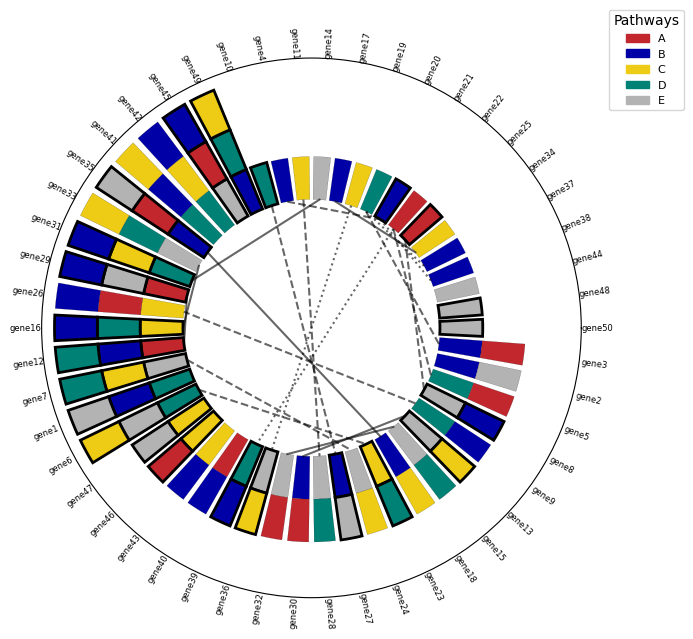

In [9]:
# Creating color reflections for diffferent pathways
colors_dict_class = {"classA":2,"classB":0.1}
colors_dict_pathway = {"A": "#c1272d", "B": "#0000a7", "C": "#eecc16", "D": "#008176", "E": "#b3b3b3"}

# Creating a figure
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "polar"}) ## create a subplot with polar coordinates
ax.set_xticks([]) ## empty list which removing all radial ticks such as angular grid or labels
ax.set_yticks([])

# Defining fixed parmeter
bar_width = 0.6  # the height of each block
text_radius = 4.2  # radius for gene name annotation

# Ploting bar
for i, row in genes_df_sorted.iterrows(): 
    start_radius_block_first_width=2 ## Empty the white inner circle for drawing connection lines
    ax.bar(row['gene_angle'], start_radius_block_first_width, bottom=0.2, width=0.1, color="white", edgecolor="white")
    for group in [i for i in row['pathways']]:
            ax.bar(row['gene_angle'], bar_width, bottom=start_radius_block_first_width, width=0.1, color=colors_dict_pathway[group], edgecolor='black',linewidth=colors_dict_class[row['gene_class']])
            start_radius_block_first_width += bar_width  # Each pathway block is stacked outward

    rotation = np.degrees(row['gene_angle'])  # Convert radians into angles
    alignment = "center"

    ## Adjust the direction of gene name
    if 0 <= row['gene_angle'] < np.pi/2 or np.pi/2*3 <= row['gene_angle'] < 2*np.pi:  # right
        ax.text(row['gene_angle'], text_radius, row['gene'], fontsize=6, ha=alignment, va="center", rotation=rotation, rotation_mode="anchor")
    else:  # left
        ax.text(row['gene_angle'], text_radius, row['gene'], fontsize=6, ha=alignment, va="center", rotation=rotation + 180, rotation_mode="anchor")

# Adding connecting lines between genes based on interaction types
for i,row in connections.iterrows():
    theta1 = genes_df_sorted.loc[genes_df_sorted['gene'] == row['source'], 'gene_angle']
    theta2 = genes_df_sorted.loc[genes_df_sorted['gene'] == row['target'], 'gene_angle']
    angle_diff = abs(theta1 - theta2) 
    if row['interaction']=="PPI":
        ax.plot([theta1, theta2], [2, 2], linestyle="--", color="black", alpha=0.6)
    elif row['interaction']=="PPI_coexpression":
        ax.plot([theta1, theta2], [2, 2], linestyle=":", color="black", alpha=0.6)
    else:
        ax.plot([theta1, theta2], [2, 2], linestyle="-", color="black", alpha=0.6)

## Adding pathway legend
legend_patches = [mpatches.Patch(color=color, label=pathway) for pathway, color in colors_dict_pathway.items()]
ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=8, title="Pathways")

## Ensureing all elements fit within the figure boundary and are visually appealing
plt.tight_layout() 
plt.show()